## Project BigData Mart 

In [1]:
#import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

In [2]:
#loading the dataset
df1 = pd.read_csv("bigmart_train.csv")
df1['source'] ='train'
print(df1.head())

  Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier

In [3]:
df2 = pd.read_csv("bigmart_test.csv")
df2["source"] = 'test'
print(df2.head())

  Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility    Item_Type  \
0           FDW58       20.750          Low Fat         0.007565  Snack Foods   
1           FDW14        8.300              reg         0.038428        Dairy   
2           NCN55       14.600          Low Fat         0.099575       Others   
3           FDQ58        7.315          Low Fat         0.015388  Snack Foods   
4           FDY38          NaN          Regular         0.118599        Dairy   

   Item_MRP Outlet_Identifier  Outlet_Establishment_Year Outlet_Size  \
0  107.8622            OUT049                       1999      Medium   
1   87.3198            OUT017                       2007         NaN   
2  241.7538            OUT010                       1998         NaN   
3  155.0340            OUT017                       2007         NaN   
4  234.2300            OUT027                       1985      Medium   

  Outlet_Location_Type        Outlet_Type source  
0               Tier 1  Super

In [4]:
df1.shape

(8523, 13)

In [5]:
df2.shape

(5681, 12)

In [6]:
data=pd.concat([df1,df2],ignore_index=True)
data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN,test
14200,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN,test
14201,NCO17,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN,test
14202,FDJ26,15.30,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN,test


In [7]:
data.shape

(14204, 13)

In [8]:
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
source                        object
dtype: object

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  source                     14204 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usag

In [10]:
data.isnull()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,True,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,False,False,False,False,False,False,False,False,False,False,False,True,False
14200,False,False,False,False,False,False,False,False,False,False,False,True,False
14201,False,False,False,False,False,False,False,False,True,False,False,True,False
14202,False,False,False,False,False,False,False,False,True,False,False,True,False


In [11]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [12]:
data.describe()  #statistical summary

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


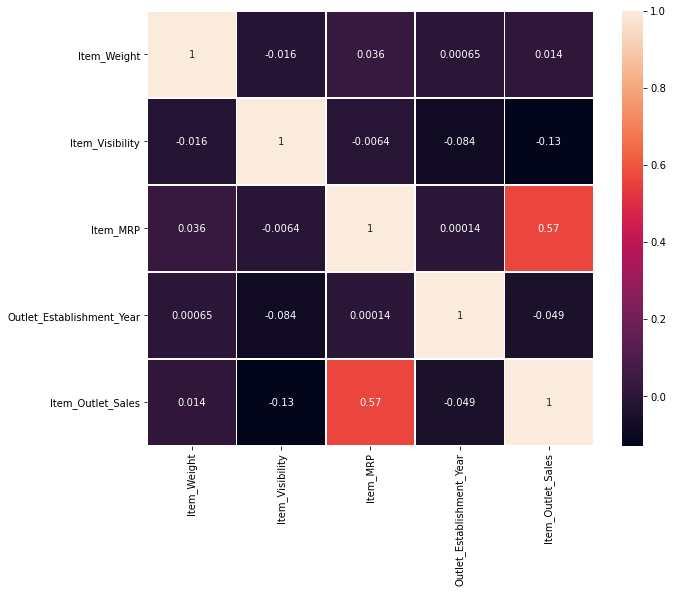

In [13]:
datacorr = data.corr()
plt.figure(figsize = (10,8))
sns.heatmap(datacorr,annot = True,linewidth = 0.5)

#observations
#Only Item_MRP and Item_Outlet_Sales shows high positive correlation of 0.57.
#All the other variables have very less correlation between each other

In [14]:
data['Item_Fat_Content'].value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

#here low fat,Low Fat,LF are the same.reg is same as Regular. so we can combine them

In [15]:
data["Item_Fat_Content"].replace("low fat","Low Fat",inplace=True)
data["Item_Fat_Content"].replace("LF","Low Fat",inplace=True)
data["Item_Fat_Content"].replace("reg","Regular",inplace=True)

In [16]:
data['Item_Fat_Content'].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [17]:
#we can use for loop for more columns value count

for i in data.columns:
    if data[i].dtype=="object":
        print(data[i].value_counts())
        print('\n')

DRA24    10
NCT30    10
FDO27    10
FDV36    10
FDT14    10
         ..
FDR51     7
FDO33     7
NCW54     7
DRN11     7
FDM52     7
Name: Item_Identifier, Length: 1559, dtype: int64


Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64


Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64


OUT027    1559
OUT013    1553
OUT046    1550
OUT035    1550
OUT049    1550
OUT045    1548
OUT018    1546
OUT017    1543
OUT010     925
OUT019     880
Name: Outlet_Identifier, dtype: int64


Medium    4655
Small     3980
High      155

In [18]:
#we can use for loop for finding no. of distinct values in all columns with object datatypes
for y in data.columns:
    if data[y].dtype=="object":
        print("name of the column is: {} and no. of distict values: {}".format(y,len(data[y].value_counts())))
        print('\n')

name of the column is: Item_Identifier and no. of distict values: 1559


name of the column is: Item_Fat_Content and no. of distict values: 2


name of the column is: Item_Type and no. of distict values: 16


name of the column is: Outlet_Identifier and no. of distict values: 10


name of the column is: Outlet_Size and no. of distict values: 3


name of the column is: Outlet_Location_Type and no. of distict values: 3


name of the column is: Outlet_Type and no. of distict values: 4


name of the column is: source and no. of distict values: 2




In [19]:
data['Item_Outlet_Sales'] = data['Item_Outlet_Sales'].fillna(data['Item_Outlet_Sales'].mean())

In [20]:
data['Item_Weight'] = data['Item_Weight'].fillna(data['Item_Weight'].mean())

In [21]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
source                          0
dtype: int64

In [22]:
data['Outlet_Size'].value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [23]:
data['Outlet_Size'] = data['Outlet_Size'].fillna('Medium')

In [24]:
data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
source                       0
dtype: int64

In [25]:
data['Item_Identifier'].value_counts()

DRA24    10
NCT30    10
FDO27    10
FDV36    10
FDT14    10
         ..
FDR51     7
FDO33     7
NCW54     7
DRN11     7
FDM52     7
Name: Item_Identifier, Length: 1559, dtype: int64

In [26]:
#taking first two letters of item identifier column we can categorize data into food,non consumable,drinks .
data['Item_Type_Combined'] = data['Item_Identifier'].apply(lambda x: x[0:2])
data['Item_Type_Combined'] = data['Item_Type_Combined'].map({'FD':'Food',
                                                             'NC':'Non-Consumable',
                                                             'DR':'Drinks'})
data['Item_Type_Combined'].value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: Item_Type_Combined, dtype: int64

In [27]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
#New variable for outlet
data['Outlet'] = le.fit_transform(data['Outlet_Identifier'])
list = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type_Combined','Outlet_Type','Outlet']
le = LabelEncoder()
for i in list:
    data[i] = le.fit_transform(data[i])

In [28]:
data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Item_Type_Combined,Outlet
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,1,0,1,3735.138000,train,1,9
1,DRC01,5.92,1,0.019278,Soft Drinks,48.2692,OUT018,2009,1,2,2,443.422800,train,0,3
2,FDN15,17.50,0,0.016760,Meat,141.6180,OUT049,1999,1,0,1,2097.270000,train,1,9
3,FDX07,19.20,1,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,1,2,0,732.380000,train,1,0
4,NCD19,8.93,0,0.000000,Household,53.8614,OUT013,1987,0,2,1,994.705200,train,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.50,1,0.013496,Snack Foods,141.3154,OUT046,1997,2,0,1,2181.288914,test,1,8
14200,FDD47,7.60,1,0.142991,Starchy Foods,169.1448,OUT018,2009,1,2,2,2181.288914,test,1,3
14201,NCO17,10.00,0,0.073529,Health and Hygiene,118.7440,OUT045,2002,1,1,1,2181.288914,test,2,7
14202,FDJ26,15.30,1,0.000000,Canned,214.6218,OUT017,2007,1,1,1,2181.288914,test,1,2


In [29]:
data = pd.get_dummies(data, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type','Item_Type_Combined','Outlet'])
data.head(10)

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,source,Item_Fat_Content_0,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDA15,9.300000,0.016047,Dairy,249.8092,OUT049,1999,3735.1380,train,1,...,0,0,0,0,0,0,0,0,0,1
1,DRC01,5.920000,0.019278,Soft Drinks,48.2692,OUT018,2009,443.4228,train,0,...,0,0,0,1,0,0,0,0,0,0
2,FDN15,17.500000,0.016760,Meat,141.6180,OUT049,1999,2097.2700,train,1,...,0,0,0,0,0,0,0,0,0,1
3,FDX07,19.200000,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,732.3800,train,0,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,8.930000,0.000000,Household,53.8614,OUT013,1987,994.7052,train,1,...,0,1,0,0,0,0,0,0,0,0
5,FDP36,10.395000,0.000000,Baking Goods,51.4008,OUT018,2009,556.6088,train,0,...,0,0,0,1,0,0,0,0,0,0
6,FDO10,13.650000,0.012741,Snack Foods,57.6588,OUT013,1987,343.5528,train,0,...,0,1,0,0,0,0,0,0,0,0
7,FDP10,12.792854,0.127470,Snack Foods,107.7622,OUT027,1985,4022.7636,train,1,...,0,0,0,0,0,1,0,0,0,0
8,FDH17,16.200000,0.016687,Frozen Foods,96.9726,OUT045,2002,1076.5986,train,0,...,0,0,0,0,0,0,0,1,0,0
9,FDU28,19.200000,0.094450,Frozen Foods,187.8214,OUT017,2007,4710.5350,train,0,...,0,0,1,0,0,0,0,0,0,0


In [30]:
data.head(5)

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,source,Item_Fat_Content_0,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDA15,9.30,0.016047,Dairy,249.8092,OUT049,1999,3735.1380,train,1,...,0,0,0,0,0,0,0,0,0,1
1,DRC01,5.92,0.019278,Soft Drinks,48.2692,OUT018,2009,443.4228,train,0,...,0,0,0,1,0,0,0,0,0,0
2,FDN15,17.50,0.016760,Meat,141.6180,OUT049,1999,2097.2700,train,1,...,0,0,0,0,0,0,0,0,0,1
3,FDX07,19.20,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,732.3800,train,0,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,8.93,0.000000,Household,53.8614,OUT013,1987,994.7052,train,1,...,0,1,0,0,0,0,0,0,0,0


In [31]:
#Also we can covert outlet establishment year to howold is outlet
data["Outlet_Establishment_Year"]=2021-data["Outlet_Establishment_Year"]

In [32]:
#lets make a column "Outlet__Years_of_operation" and drop "Outlet_Establishment_Year"
data["Outlet__Years_of_operation"]=data["Outlet_Establishment_Year"]
data.drop(columns=["Outlet_Establishment_Year"],inplace=True)

In [33]:
#skewness
b = ["Item_MRP","Item_Visibility","Item_Weight","Outlet__Years_of_operation"]
for a in data.skew().index:
    if a in b:
        print("Skewness of column {} is: {}".format(a,data.skew().loc[a]))

Skewness of column Item_Weight is: 0.11131389957012323
Skewness of column Item_Visibility is: 1.1951751774587889
Skewness of column Item_MRP is: 0.13072836040225863
Skewness of column Outlet__Years_of_operation is: 0.3964651900863859


In [34]:
from sklearn.preprocessing import power_transform
data[["Item_Visibility"]] = power_transform(data[["Item_Visibility"]], method = 'yeo-johnson')

In [35]:
data['Item_Visibility'].skew()

0.12133160626235548

In [36]:
#lets drop ["Item_Identifier","Outlet_Identifier","source"]
data.drop(columns=["Item_Identifier","Outlet_Identifier","Item_Type"],inplace=True)

In [37]:
#Lets seprate the train and test
df_train=data.loc[data["source"]=="train"]
df_test=data.loc[data["source"]=="test"]
df_test.reset_index(drop=True,inplace=True)
print(df_train.columns)
print(df_test.columns)

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales',
       'source', 'Item_Fat_Content_0', 'Item_Fat_Content_1',
       'Outlet_Location_Type_0', 'Outlet_Location_Type_1',
       'Outlet_Location_Type_2', 'Outlet_Size_0', 'Outlet_Size_1',
       'Outlet_Size_2', 'Outlet_Type_0', 'Outlet_Type_1', 'Outlet_Type_2',
       'Outlet_Type_3', 'Item_Type_Combined_0', 'Item_Type_Combined_1',
       'Item_Type_Combined_2', 'Outlet_0', 'Outlet_1', 'Outlet_2', 'Outlet_3',
       'Outlet_4', 'Outlet_5', 'Outlet_6', 'Outlet_7', 'Outlet_8', 'Outlet_9',
       'Outlet__Years_of_operation'],
      dtype='object')
Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales',
       'source', 'Item_Fat_Content_0', 'Item_Fat_Content_1',
       'Outlet_Location_Type_0', 'Outlet_Location_Type_1',
       'Outlet_Location_Type_2', 'Outlet_Size_0', 'Outlet_Size_1',
       'Outlet_Size_2', 'Outlet_Type_0', 'Outlet_Type_1', 'Outlet_Type_2',
       'Outlet_Type_3', 'Item_Type_Com

In [38]:
#Lets drop the Item_Outlet_Sales from test dataset as that is the target variable 
df_test.drop(columns=["Item_Outlet_Sales"],inplace=True)

In [39]:
#lets drop source column from df_train and df_test
df_train.drop(columns=["source"],inplace=True)
df_test.drop(columns=["source"],inplace=True)

In [40]:
#seprating input and output from df_train
df_x=df_train.drop(columns=["Item_Outlet_Sales"])
y=df_train[["Item_Outlet_Sales"]]

In [41]:
#Standard Sclaer
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)

In [42]:
#finding the best random state
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

In [43]:
best_rstate = 0
accu = 0
for i in range (30,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = i)
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    y_pred = lr.predict(x_test)
    tempaccu = r2_score(y_test,y_pred)
    if tempaccu > accu:
        accu = tempaccu
        best_rstate = i
        
        
print(f"Best accuracy : {accu*100} found on random state :{best_rstate}")

Best accuracy : 59.42529634061346 found on random state :112


In [44]:
#creating train test split using best random state
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .2,random_state =112)

In [45]:
#finding the best model

##### Linear regression

In [46]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
r2score = r2_score(y_test,y_pred)
cvscore = cross_val_score(lr,x_train,y_train,cv=5).mean()
print(f"Accuracy : {r2score*100}, cross_val_score : {cvscore*100} & differnece : {(r2score*100)-(cvscore*100)}")

Accuracy : 59.42529634061346, cross_val_score : 55.32689777736828 & differnece : 4.098398563245176


##### Random Forest Regressor

In [47]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
r2score = r2_score(y_test,y_pred)
cvscore = cross_val_score(rf,x_train,y_train,cv=5).mean()
print(f"Accuracy : {r2score*100}, cross_val_score : {cvscore*100} & differnece : {(r2score*100)-(cvscore*100)}")

Accuracy : 59.517978171207254, cross_val_score : 53.98987020981003 & differnece : 5.528107961397225


##### KNN

In [48]:
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor()
knr.fit(x_train,y_train)
y_pred = knr.predict(x_test)
r2score = r2_score(y_test,y_pred)
cvscore = cross_val_score(knr,x_train,y_train,cv=5).mean()
print(f"Accuracy : {r2score*100}, cross_val_score : {cvscore*100} & differnece : {(r2score*100)-(cvscore*100)}")

Accuracy : 54.64687235153305, cross_val_score : 49.91891813674301 & differnece : 4.727954214790039


In [49]:
#we can proceed with Random Forest Regressor 

##### Hyperparameter Tuning

In [50]:
#create a list of parameters to pass in GridSearchCV
parameters = {"n_estimators":[10,100,500]}

In [51]:
from sklearn.model_selection import GridSearchCV
gcv = GridSearchCV(rf,parameters,cv=5,scoring ='r2')  # intializing GCV
gcv.fit(x_train,y_train)
gcv.best_estimator_   #finding best estimator
gcv_pred = gcv.best_estimator_.predict(x_test)  #predicting th value using best estimator found by GridSearchCV
print("Accuracy score: ", r2_score(y_test,gcv_pred)*100)

Accuracy score:  59.77711302438256


##### Serialization

In [52]:
import joblib
joblib.dump(gcv.best_estimator_,"bigdata_martproject.pkl")

['bigdata_martproject.pkl']